## Titanic Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
titanic_df = pd.read_csv('./titanic.csv')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### logistic regression needs numerical columns,lets clean the data

In [29]:
titanic_df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [30]:
# check if any null values
titanic_df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

#### Plotting the survivors and non-survivors

&lt;AxesSubplot:xlabel=&#39;Survived&#39;, ylabel=&#39;count&#39;&gt;

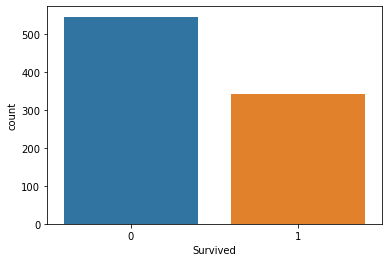

In [31]:
sns.countplot(x='Survived', data=titanic_df)

#### Male vs Female Survivors

&lt;AxesSubplot:xlabel=&#39;Survived&#39;, ylabel=&#39;count&#39;&gt;

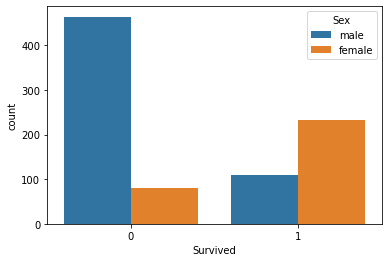

In [32]:
sns.countplot(x='Survived', data=titanic_df, hue='Sex')

#### Survivors based on Passenger Class

&lt;AxesSubplot:xlabel=&#39;Survived&#39;, ylabel=&#39;count&#39;&gt;

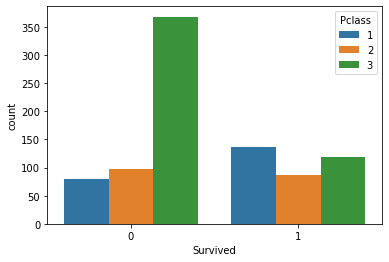

In [33]:
sns.countplot(x='Survived', data=titanic_df, hue='Pclass')

#### Passengers Age distribution

&lt;AxesSubplot:xlabel=&#39;Age&#39;&gt;

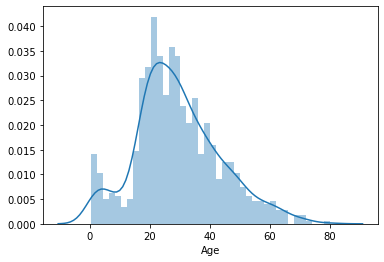

In [35]:
sns.distplot(titanic_df['Age'], bins=40)

&lt;AxesSubplot:ylabel=&#39;Frequency&#39;&gt;

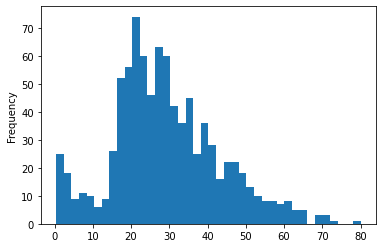

In [37]:
titanic_df['Age'].plot.hist(bins=40)

&lt;AxesSubplot:xlabel=&#39;Siblings/Spouses Aboard&#39;, ylabel=&#39;count&#39;&gt;

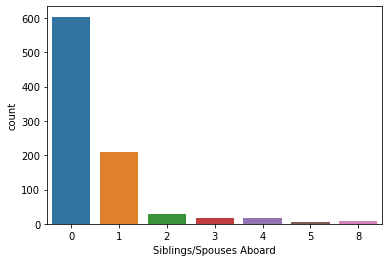

In [39]:
sns.countplot(x='Siblings/Spouses Aboard', data=titanic_df)

&lt;AxesSubplot:&gt;

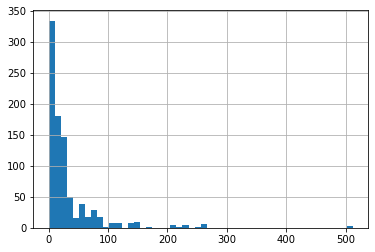

In [42]:
titanic_df['Fare'].hist(bins=50)

#### Age distribution according to Passenger Class

&lt;AxesSubplot:xlabel=&#39;Pclass&#39;, ylabel=&#39;Age&#39;&gt;

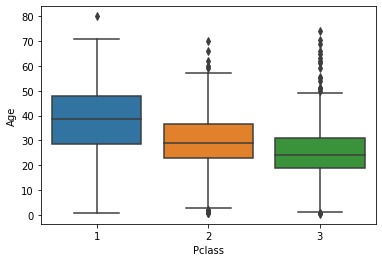

In [43]:
sns.boxplot(x='Pclass',y='Age', data=titanic_df)

In [5]:
# drop the name column
titanic_df.drop('Name', inplace=True, axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
dummies = pd.get_dummies(titanic_df['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [57]:
# Columns Male and Female can predict each other
sex_dummy = pd.get_dummies(titanic_df['Sex'], drop_first=True)
sex_dummy

,male
0,1
1,0
2,0
3,0
4,1
...,...
882,1
883,0
884,0
885,1


In [59]:
titanic_df = pd.concat([titanic_df, sex_dummy], axis=1)
titanic_df.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [48]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1


In [49]:
titanic_df['Siblings/Spouses Aboard'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [50]:
titanic_df['Parents/Children Aboard'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [58]:
# ran above code twice hence, lets drop columns
titanic_df.drop(['Siblings/Spouses Aboard','Parents/Children Aboard', 'Name','Sex'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [52]:
titanic_df.drop('Sex', inplace=True, axis=1)
titanic_df.head()

,Survived,Pclass,Name,Age,Fare,male
0,0,3,Mr. Owen Harris Braund,22.0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,71.2833,0
2,1,3,Miss. Laina Heikkinen,26.0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,53.1000,0
4,0,3,Mr. William Henry Allen,35.0,8.0500,1


In [60]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [61]:
X.head()

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [62]:
X.dtypes

Pclass      int64
Age       float64
Fare      float64
male        uint8
dtype: object

In [63]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [64]:
y.dtypes

dtype(&#39;int64&#39;)

In [65]:
# lets split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((709, 4), (709,), (178, 4), (178,))

In [67]:
# import logistic regression model from scikit library
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# score from the model
model.score(X_test, y_test)

0.7921348314606742

In [69]:
# model prediction
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [70]:
# lets check the metrics of the model
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_preds)
cm

array([[88, 21],
       [16, 53]], dtype=int64)

&lt;AxesSubplot:&gt;

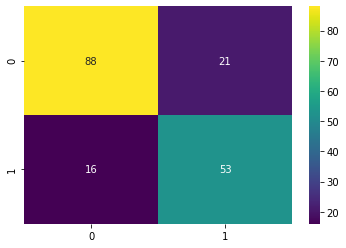

In [71]:
sns.heatmap(cm, annot=True, cmap='viridis')

In [72]:
accuracy_score(y_test, y_preds)

0.7921348314606742

In [75]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

